In [16]:
import os, sys
import h5py
import numpy as np
import pandas as pd
from scipy.interpolate import InterpolatedUnivariateSpline
from scipy import optimize
import matplotlib.pyplot as plt
from scipy import integrate
from scipy.optimize import curve_fit
from scipy.stats import norm
import matplotlib.font_manager as font_manager
from tqdm.autonotebook import tqdm
from matplotlib.backends.backend_pdf import PdfPages
import time
from scipy.optimize import curve_fit
from scipy.stats import norm
from scipy import stats
import scipy.stats

import etroc1_array

number of lines is 200000
cnt[0:5] is [29036, 29037, 29038, 29039, 29040]


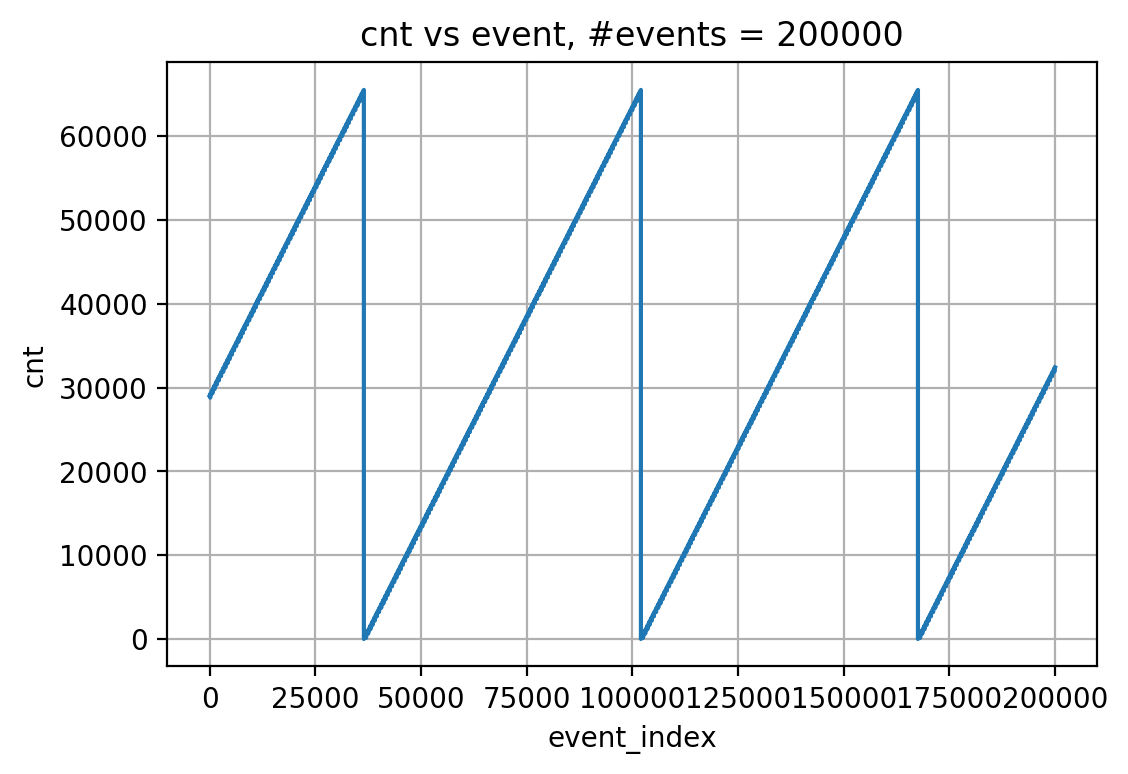

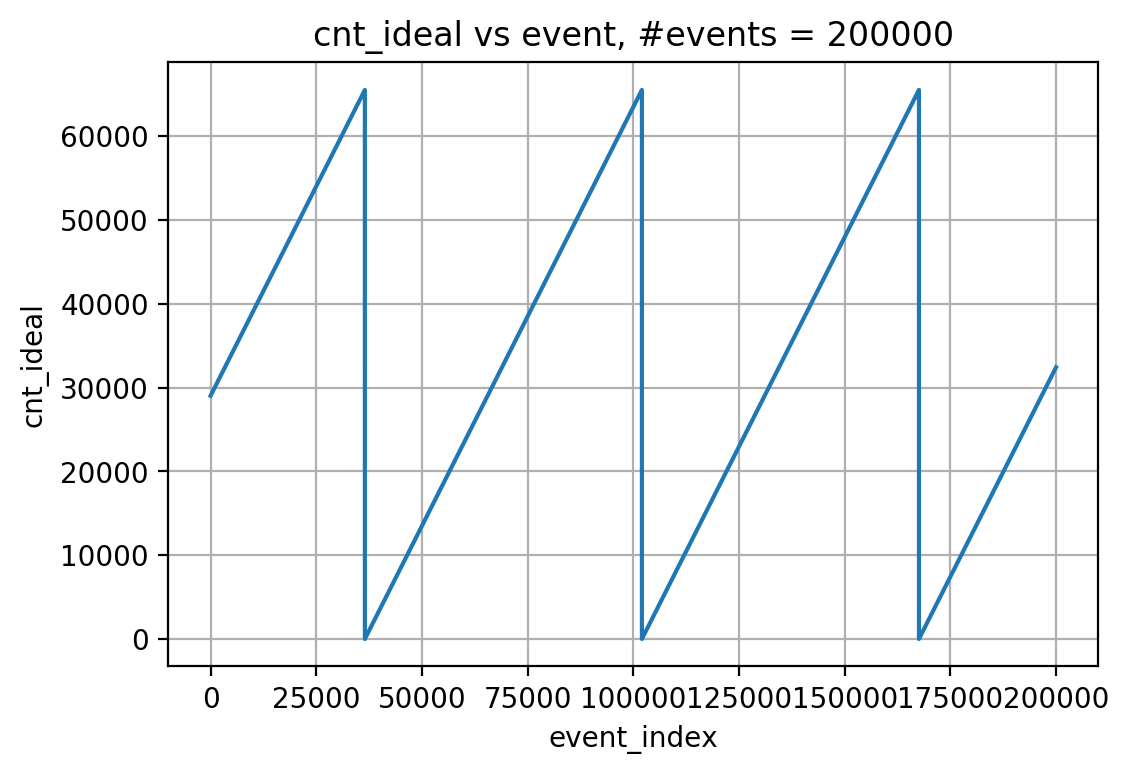

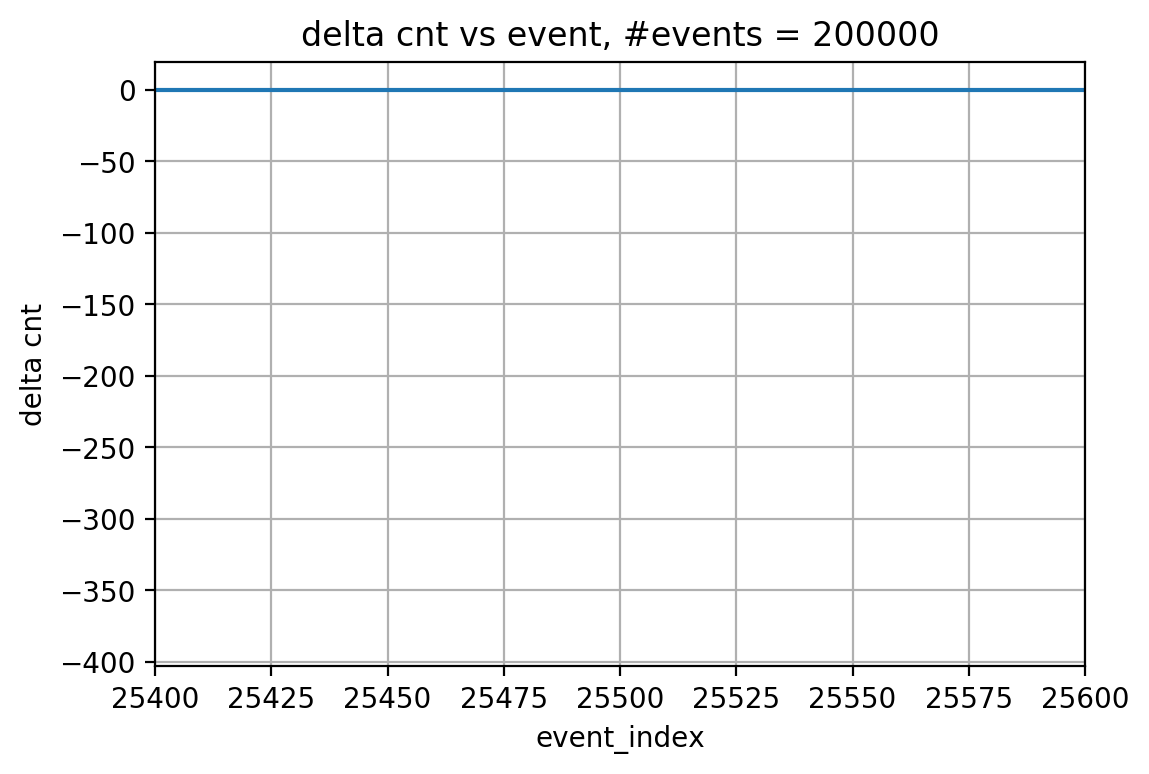

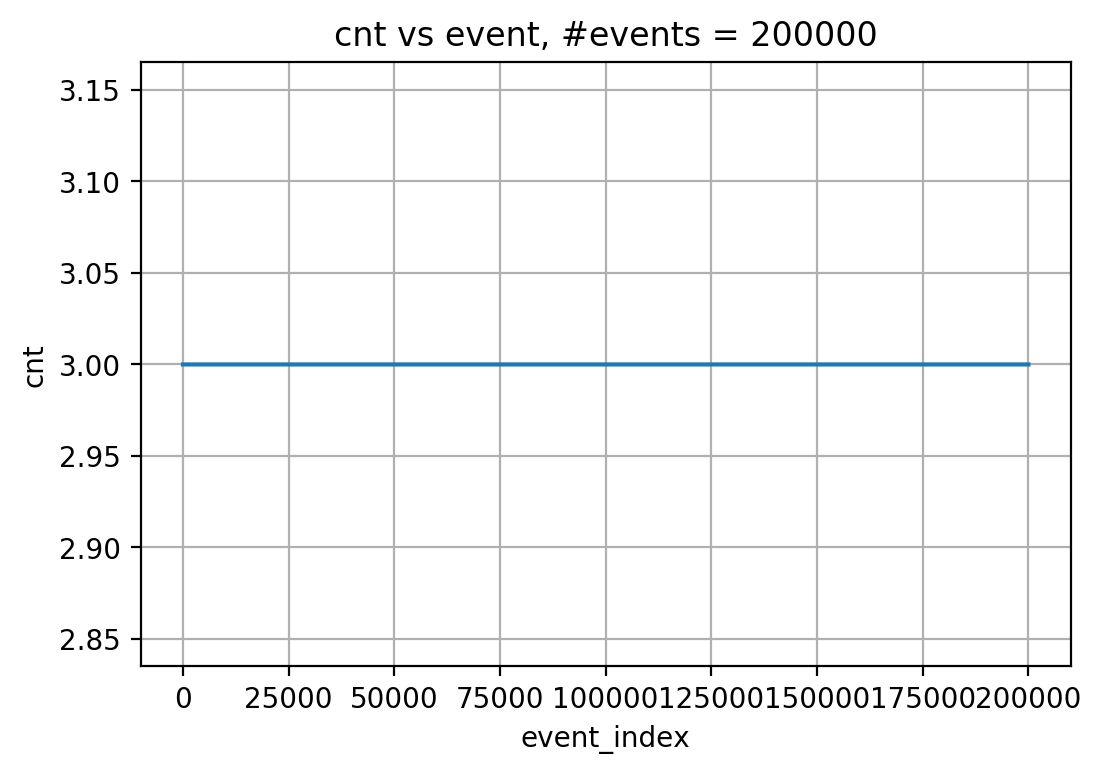

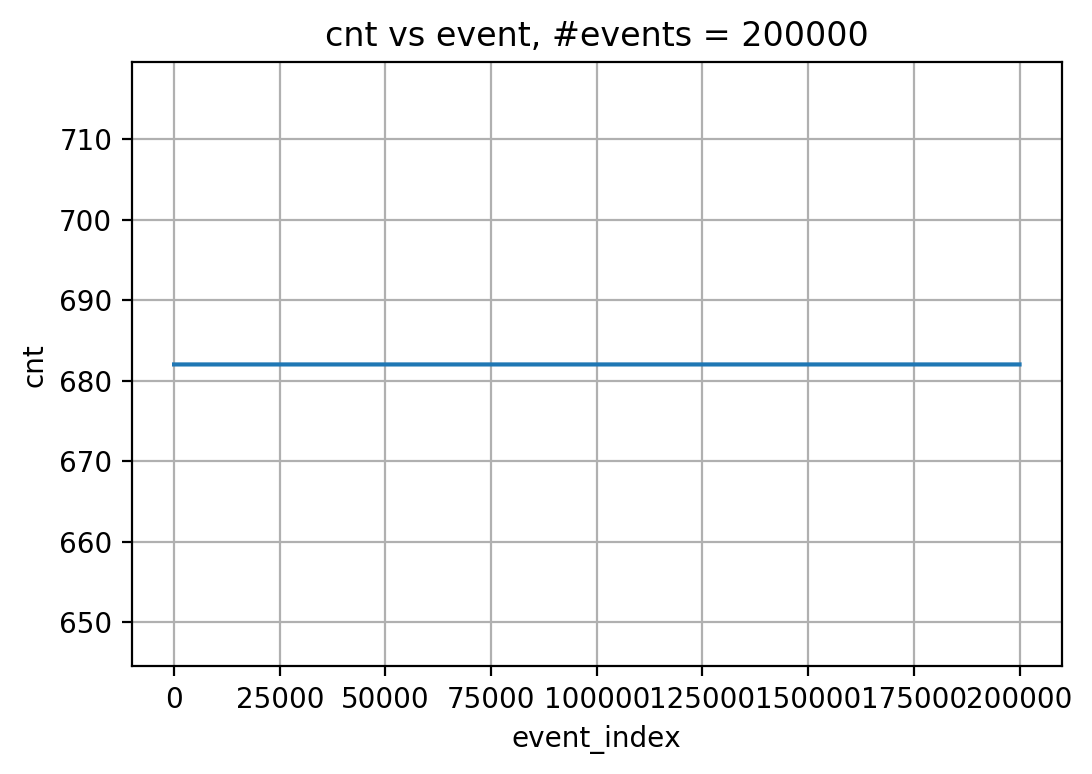

In [19]:
# path = '../../../CMS ETL ASIC/ETROC1/test/test results/SMU/ETROC1 arrary at smu/2020-06-30_Array_Test_Results/'
path = './data/Test_Pattern_Data/'
# file_in = 'Array_Data_Pixel=15_DAC_P15=409_QSel=6_CLSel=1_RfSel=3_IBSel=7_TDC_testMode=0_PhaseAdj=30_TDC_Mode_Output_B1_1000000_2020-07-01_17-22-24.dat'
# file_in = 'Array_Data_Pixel=15_DAC_P15=409_QSel=18_CLSel=1_RfSel=3_IBSel=7_TDC_testMode=0_PhaseAdj=30_TDC_Mode_Output_B1_1000000_2020-07-01_17-23-08.dat'
file_in = 'Array_C_Pixel=15_DAC_P15=419_QSel=6_CLSel=0_RfSel=3_IBSel=7_TDC_testMode=0_PhaseAdj=201_B1_200000_07-14_11-55-31.dat'


f_r = open(path+file_in, 'r')
lines = f_r.readlines()
f_r.close()

num_lines = len(lines)

print('number of lines is', num_lines)

word_to_plot = num_lines


cnt=[0]*num_lines
vth=[0]*num_lines
fixpattern=[0]*num_lines
events = 0
for i in range (0, num_lines):
    line_item = lines[i]
    cnt[i]=int(lines[i])&int('1111111111111111',2)
    vth[i]=(int(lines[i])>>16)&int('1111',2)
    fixpattern[i]=(int(lines[i])>>20)&int('1111111111',2)
    events = events + 1
    
cnt_i=[0]*num_lines
vth_i=[0]*num_lines
fixpattern_i=[0]*num_lines
for i in range (0, num_lines):
    if i==0:
        cnt_i[i] =  cnt[i]
        vth_i[i] = vth[i]
        fixpattern_i[i] = fixpattern[i]
    else:
        cnt_i[i] =  (cnt_i[i-1] + 1)%65536
        vth_i[i] = vth_i[i-1]
        fixpattern_i[i] = fixpattern_i[i-1]
    
print('cnt[0:5] is', cnt[0:5])

num_bins = None

left_limit = 25400
right_limit = 25600

######### Plot cnt with word_index  ###########
fig, ax1 = plt.subplots(dpi=200)
ax1.plot(cnt)
# ax1.set_xlim(left=left_limit,right=right_limit)
ax1.grid()
ax1.set(xlabel='event_index', ylabel='cnt',
       title='cnt vs event, #events = %d'%(events))
plt.show()

######### Plot cnt ideal with word_index  ###########
fig, ax1 = plt.subplots(dpi=200)
ax1.plot(cnt_i)
# ax1.set_xlim(left=left_limit,right=right_limit)
ax1.grid()
ax1.set(xlabel='event_index', ylabel='cnt_ideal',
       title='cnt_ideal vs event, #events = %d'%(events))
plt.show()


######### Plot delta cnt with word_index  ###########
fig, ax1 = plt.subplots(dpi=200)
ax1.plot(np.array(cnt)-np.array(cnt_i))
ax1.set_xlim(left=left_limit,right=right_limit)
ax1.grid()
ax1.set(xlabel='event_index', ylabel='delta cnt',
       title='delta cnt vs event, #events = %d'%(events))
plt.show()

######### Plot vth with word_index  ###########
fig, ax1 = plt.subplots(dpi=200)
ax1.plot(vth)
# ax1.set_xlim(left=left_limit,right=right_limit)
ax1.grid()
ax1.set(xlabel='event_index', ylabel='cnt',
       title='cnt vs event, #events = %d'%(events))
plt.show()

######### Plot pattern with word_index  ###########
fig, ax1 = plt.subplots(dpi=200)
ax1.plot(fixpattern)
# ax1.set_xlim(left=left_limit,right=right_limit)
ax1.grid()
ax1.set(xlabel='event_index', ylabel='cnt',
       title='cnt vs event, #events = %d'%(events))
plt.show()


# ######### Plot toa hist  ###########
# # fig, ax2 = plt.subplots(dpi=200)
# # ax2.hist(toa)
# # ax2.grid()
# # ax2.set(xlabel='toa', ylabel='occurrence',
# #        title='toa hist, #events = %d'%(events))
# # plt.show()

# etroc1_array.plot_distribution_toa(toa, num_bins= None, range_default = None, xaxis = 'TOA',
#                         ylable = 'Occurrence', title = 'TOA Hist', pic = True, pdf = False)


# ######### Plot tot with word_index  ###########
# fig, ax1 = plt.subplots(dpi=200)
# ax1.plot(tot)
# # ax1.set_xlim(left=left_limit,right=right_limit)
# ax1.grid()
# ax1.set(xlabel='event_index', ylabel='tot',
#        title='tot vs event, #events = %d'%(events))
# plt.show()


# ######### Plot tot hist  ###########
# # fig, ax2 = plt.subplots(dpi=200)
# # ax2.hist(tot, bins=num_bins)
# # ax2.grid()
# # ax2.set(xlabel='tot', ylabel='occurrence',
# #        title='tot hist, #events = %d'%(events))
# # plt.show()

# etroc1_array.plot_distribution_toa(tot, num_bins= None, range_default = None, xaxis = 'TOT',
#                         ylable = 'Occurrence', title = 'TOT Hist', pic = True, pdf = False)


# ######### Plot tot with word_index  ###########
# fig, ax1 = plt.subplots(dpi=200)
# ax1.plot(cal)
# # ax1.set_xlim(left=left_limit,right=right_limit)
# ax1.grid()
# ax1.set(xlabel='event_index', ylabel='toa',
#        title='cal vs event, #events = %d'%(events))
# plt.show()


# ######### Plot cal hist  ###########
# # fig, ax2 = plt.subplots(dpi=200)
# # ax2.hist(cal, bins=num_bins)
# # ax2.grid()
# # ax2.set(xlabel='tot', ylabel='occurrence',
# #        title='cal hist, #events = %d'%(events))
# # plt.show()

# etroc1_array.plot_distribution_toa(cal, num_bins= None, range_default = None, xaxis = 'CAL',
#                         ylable = 'Occurrence', title = 'Cal Hist', pic = True, pdf = False)
